In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

test = pd.read_csv('/Users/tyco/Desktop/MADS/sanovo_19052025/data/raw/HSTMachineError.csv')
test.head()

,MerId,MerType,MerDate,MerNumber,MerSubNumber,MerData1,MerData2,MerData3,MerData4,MerData5,MerMinId,MerText,MerDeviceType,MerDeviceNumber,MerPriority
0,11897185,7,2025-01-30 10:22:00.000,10,22,181.0,180.0,90.0,NaN,NaN,4620,NaN,0,0,0
1,11897186,21,2025-01-30 10:21:42.000,460,12,1.0,22.0,41.0,NaN,NaN,4620,NaN,0,0,0
2,11897187,23,2025-01-30 10:21:56.000,460,12,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0
3,11897188,21,2025-01-30 10:21:56.000,460,12,1.0,22.0,41.0,NaN,NaN,4620,NaN,0,0,0
4,11897189,23,2025-01-30 10:21:57.000,460,12,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0


In [69]:
data1= test[test['MerType'] == 15]
data1['MerNumber'].value_counts()

MerNumber
11     35269
1      30203
250     6844
243     6270
241     1771
242      298
253      279
Name: count, dtype: int64

Aggregate data  by day

In [71]:
# Convert MerDate to datetime if not already done
test['MerDate'] = pd.to_datetime(test['MerDate'])

# Extract the date part from MerDate
test['MerDateDay'] = test['MerDate'].dt.date

# Aggregate data by day and count the specified values of MerType
aggregated_data = test.groupby('MerDateDay').apply(
    lambda x: pd.Series({
        'Total errors': (x['MerType'] == 21).sum(),
        'Total warnings': (x['MerType'] == 23).sum(),
        'Total settings changed': (x['MerType'] == 15).sum(),
        'Total stops lane related': ((x['MerType'] == 8) & (x['MerNumber'] == 0) & (x['MerSubNumber'] == 2)).sum(), #we only want lane related errors MerSubNumber 2 is lane related
        'Total stops': ((x['MerType'] == 8) & (x['MerNumber'] == 0)).sum()
    })
).reset_index()

aggregated_data.head(5)

/var/folders/pt/00xl4yzd64s0vbx9w9tzh94m0000gn/T/ipykernel_79393/251424520.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aggregated_data = test.groupby('MerDateDay').apply(


,MerDateDay,Total errors,Total warnings,Total settings changed,Total stops lane related,Total stops
0,2025-01-30,2983,10999,862,413,493
1,2025-01-31,2618,12839,1366,247,312
2,2025-02-01,0,1,0,0,0
3,2025-02-02,38,39,0,0,0
4,2025-02-03,3462,7481,1264,356,473


In [72]:
aggregated_data.describe()

,Total errors,Total warnings,Total settings changed,Total stops lane related,Total stops
count,68.000000,68.000000,68.000000,68.000000,68.000000
mean,2804.647059,12877.279412,1190.205882,282.838235,364.764706
std,1858.066687,9754.092765,794.288540,205.735420,254.793690
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,799.250000,1040.000000,153.000000,1.500000,37.000000
50%,3226.000000,13469.000000,1518.500000,319.500000,446.000000
75%,4071.000000,18866.000000,1757.000000,436.000000,547.250000
max,6632.000000,41844.000000,3338.000000,689.000000,846.000000


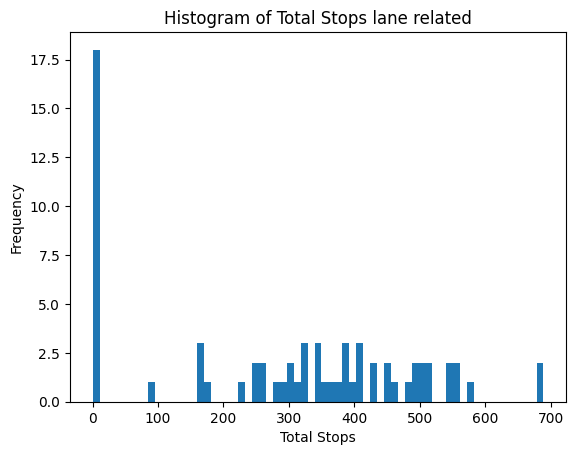

In [73]:
plt.hist(aggregated_data['Total stops lane related'], bins=65)
plt.title('Histogram of Total Stops lane related')
plt.xlabel('Total Stops')
plt.ylabel('Frequency')
plt.show()

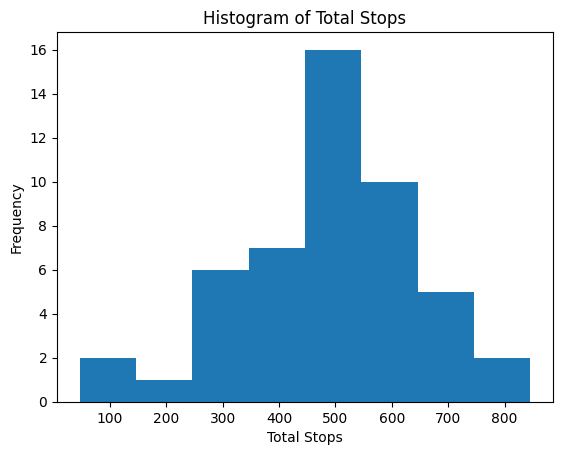

In [74]:
plt.hist(filtered_data['Total stops'], bins=8)
plt.title('Histogram of Total Stops')
plt.xlabel('Total Stops')
plt.ylabel('Frequency')
plt.show()

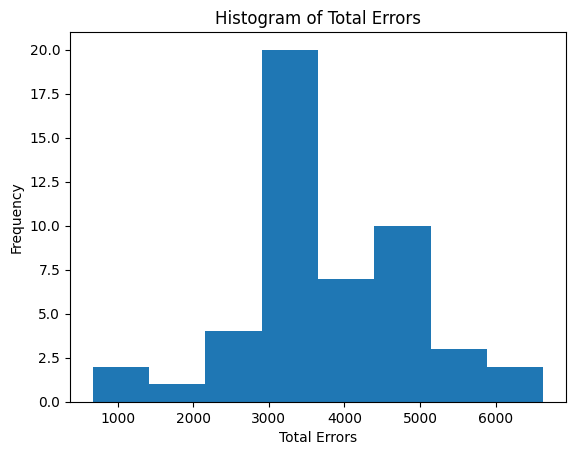

In [75]:
plt.hist(filtered_data['Total errors'], bins=8)
plt.title('Histogram of Total Errors')
plt.xlabel('Total Errors')
plt.ylabel('Frequency')
plt.show()

Removing weekends

In [76]:
# Convert MerDateDay to datetime if not already done
aggregated_data['MerDateDay'] = pd.to_datetime(aggregated_data['MerDateDay'])

# Filter out weekend dates (Saturday and Sunday)
filtered_data = aggregated_data[~aggregated_data['MerDateDay'].dt.weekday.isin([5, 6])]

filtered_data.head()

,MerDateDay,Total errors,Total warnings,Total settings changed,Total stops lane related,Total stops
0,2025-01-30,2983,10999,862,413,493
1,2025-01-31,2618,12839,1366,247,312
4,2025-02-03,3462,7481,1264,356,473
5,2025-02-04,3588,12289,1361,301,393
6,2025-02-05,3618,11115,1127,385,458


In [77]:
filtered_data[filtered_data['Total errors'] < 1000]

,MerDateDay,Total errors,Total warnings,Total settings changed,Total stops lane related,Total stops
52,2025-03-24,977,6546,550,88,120
53,2025-03-25,668,1120,202,2,46


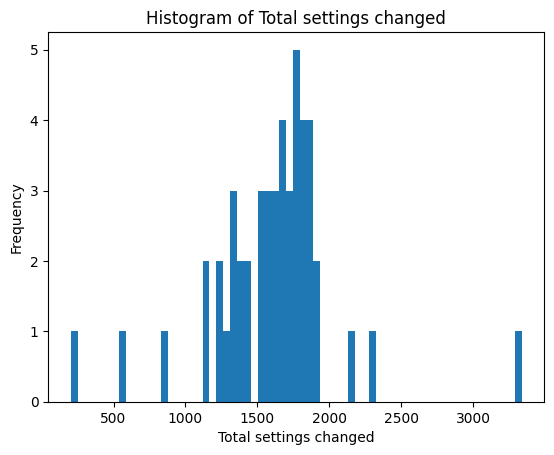

In [80]:
plt.hist(filtered_data['Total settings changed'], bins=65)
plt.title('Histogram of Total settings changed')
plt.xlabel('Total settings changed')
plt.ylabel('Frequency')
plt.show()

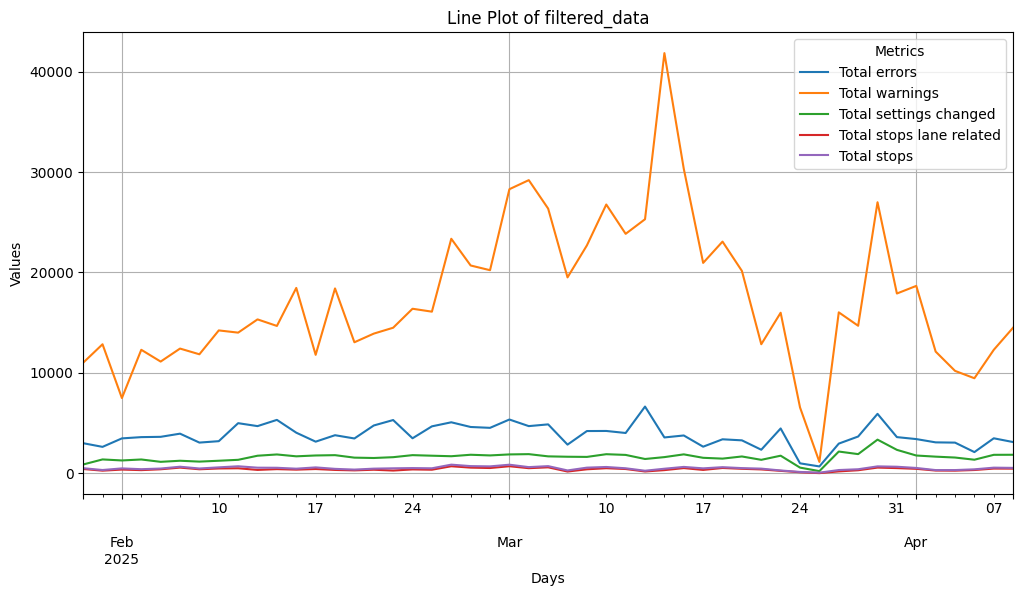

In [87]:
# Plot a line for each column in the DataFrame
filtered_data.plot(x='MerDateDay', y=['Total errors', 'Total warnings', 'Total settings changed', 'Total stops lane related', 'Total stops'], kind='line', figsize=(12, 6))

# Add labels and title
plt.xlabel('Days')
plt.ylabel('Values')
plt.title('Line Plot of filtered_data')
plt.legend(title='Metrics')
plt.grid(True)
plt.show()

In [92]:
filtered_data[filtered_data['MerDateDay'] == '2025-03-26']

,MerDateDay,Total errors,Total warnings,Total settings changed,Total stops lane related,Total stops
54,2025-03-26,2942,16019,2152,175,309


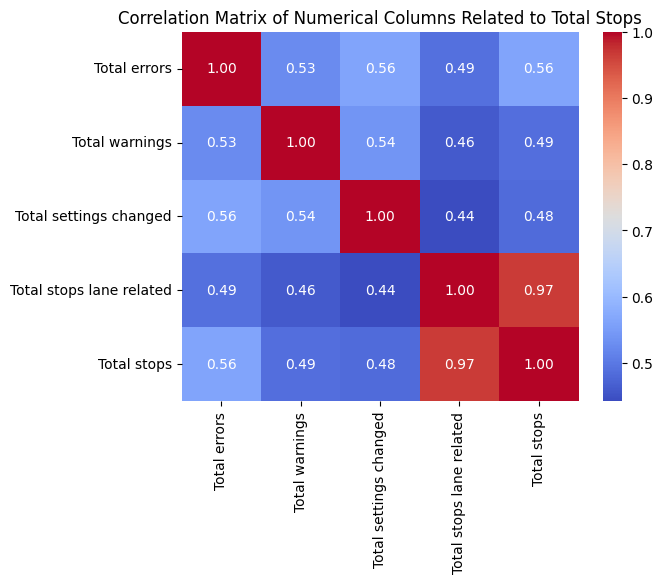

In [94]:
# Select numerical columns related to 'Total stops'
numerical_columns = ['Total errors', 'Total warnings', 'Total settings changed', 'Total stops lane related', 'Total stops']

# Compute the correlation matrix
correlation_matrix = filtered_data[numerical_columns].corr()

# Optionally, visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Columns Related to Total Stops')
plt.show()

In [95]:
snapshots = pd.read_csv('/Users/tyco/Desktop/MADS/sanovo_19052025/data/processed/data_snapshots.csv')
snapshots.head()

,index,MerDate,MerId,MerType,MerNumber,MerSubNumber,MerData1,MerData2,MerData3,MerData4,MerData5,MerMinId,MerText,MerDeviceType,MerDeviceNumber,MerPriority,Error/warnings,lane_stopping_machine,snapshot,time_delta
0,0,2025-01-30 10:21:42,11897186,21,460,12,1.0,22.0,41.0,NaN,NaN,4620,NaN,0,0,0,21_460_22.0_41.0,NaN,1,0 days 00:04:02
1,1,2025-01-30 10:21:56,11897187,23,460,12,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,23_460_0.0_0.0,NaN,1,0 days 00:04:02
2,2,2025-01-30 10:21:56,11897188,21,460,12,1.0,22.0,41.0,NaN,NaN,4620,NaN,0,0,0,21_460_22.0_41.0,NaN,1,0 days 00:04:02
3,3,2025-01-30 10:21:57,11897189,23,460,12,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,23_460_0.0_0.0,NaN,1,0 days 00:04:02
4,4,2025-01-30 10:21:57,11897190,21,460,12,1.0,22.0,41.0,NaN,NaN,4620,NaN,0,0,0,21_460_22.0_41.0,NaN,1,0 days 00:04:02


In [97]:
# Filter data for error code 21 and MerNumber > 400
filtered_errors = snapshots[(snapshots['MerType'] == 21) & (snapshots['MerNumber'] > 400)]

# Create a new column for each lane and count occurrences
lane_error_counts = filtered_errors.groupby(['snapshot', 'MerSubNumber']).size().unstack(fill_value=0)

# Merge the lane error counts back into the snapshots DataFrame
snapshots_with_lane_errors = snapshots.merge(lane_error_counts, how='left', on='snapshot').fillna(0)

# Rename columns to indicate lane-specific error counts
snapshots_with_lane_errors.rename(columns=lambda x: f"Lane_{int(x)}_Error21_Count" if isinstance(x, int) else x, inplace=True)

snapshots_with_lane_errors.head()

,index,MerDate,MerId,MerType,MerNumber,MerSubNumber,MerData1,MerData2,MerData3,MerData4,...,Lane_9_Error21_Count,Lane_10_Error21_Count,Lane_11_Error21_Count,Lane_12_Error21_Count,Lane_13_Error21_Count,Lane_14_Error21_Count,Lane_15_Error21_Count,Lane_16_Error21_Count,Lane_17_Error21_Count,Lane_18_Error21_Count
0,0,2025-01-30 10:21:42,11897186,21,460,12,1.0,22.0,41.0,0.0,...,0.0,1.0,0.0,9.0,0.0,0.0,0.0,2.0,0.0,0.0
1,1,2025-01-30 10:21:56,11897187,23,460,12,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,9.0,0.0,0.0,0.0,2.0,0.0,0.0
2,2,2025-01-30 10:21:56,11897188,21,460,12,1.0,22.0,41.0,0.0,...,0.0,1.0,0.0,9.0,0.0,0.0,0.0,2.0,0.0,0.0
3,3,2025-01-30 10:21:57,11897189,23,460,12,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,9.0,0.0,0.0,0.0,2.0,0.0,0.0
4,4,2025-01-30 10:21:57,11897190,21,460,12,1.0,22.0,41.0,0.0,...,0.0,1.0,0.0,9.0,0.0,0.0,0.0,2.0,0.0,0.0


In [101]:
lane_error_counts.describe()

MerSubNumber,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,16882.000000,16882.000000,16882.000000,16882.000000,16882.000000,16882.000000,16882.000000,16882.000000,16882.000000,16882.000000,16882.000000,16882.000000,16882.000000,16882.000000,16882.000000,16882.000000,16882.000000,16882.000000
mean,0.412629,0.411918,0.508293,0.387928,0.382301,0.274730,0.277988,0.247956,0.580855,0.440884,0.834143,0.777870,0.501303,0.842436,0.497808,0.791849,0.568535,0.181436
std,2.100852,2.099017,2.398009,2.198848,2.533639,2.758831,2.398541,2.354618,3.184697,2.535308,2.939305,3.004913,2.568422,3.427440,2.617495,2.911593,2.710978,2.257454
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,206.000000,206.000000,208.000000,208.000000,217.000000,211.000000,210.000000,211.000000,319.000000,213.000000,213.000000,210.000000,215.000000,209.000000,210.000000,210.000000,216.000000,211.000000


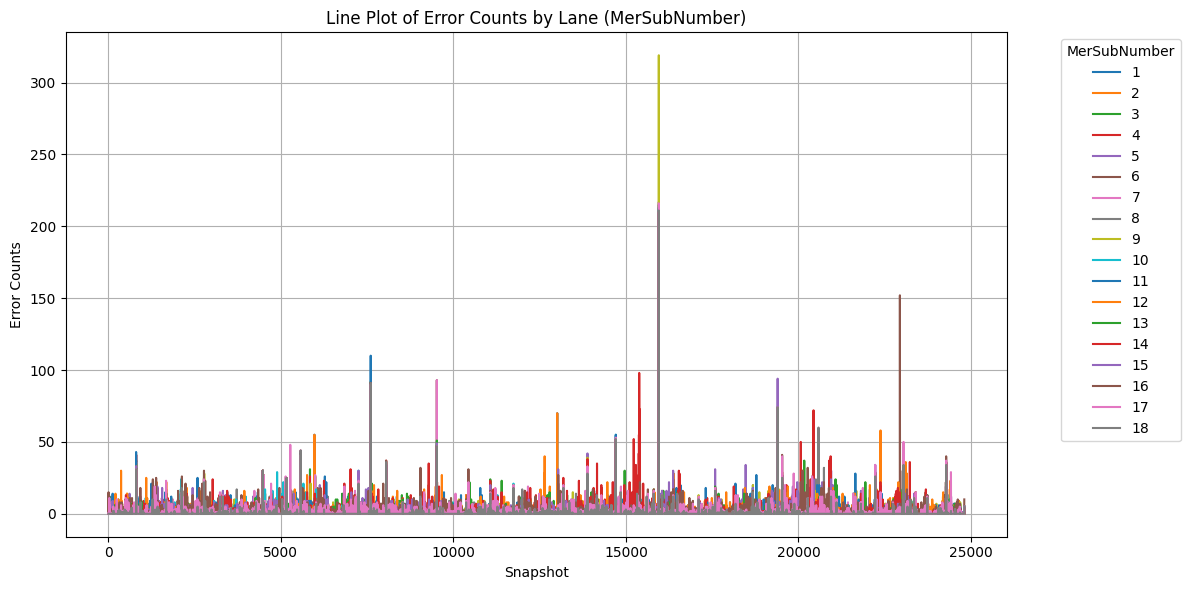

In [99]:
lane_error_counts.plot(kind='line', figsize=(12, 6))

# Add labels and title
plt.xlabel('Snapshot')
plt.ylabel('Error Counts')
plt.title('Line Plot of Error Counts by Lane (MerSubNumber)')
plt.legend(title='MerSubNumber', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()